In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
u = lambda x,epsinv,psi: 1/psi * (1+(np.exp(psi*epsinv)-1)*x - np.exp(x*psi*epsinv))/(np.exp(psi*epsinv)-1)

C:\Users\jhvid\AppData\Local\Temp\ipykernel_19820\2649797789.py:1: RuntimeWarning: overflow encountered in exp
  u = lambda x,epsinv,psi: 1/psi * (1+(np.exp(psi*epsinv)-1)*x - np.exp(x*psi*epsinv))/(np.exp(psi*epsinv)-1)
C:\Users\jhvid\AppData\Local\Temp\ipykernel_19820\2649797789.py:1: RuntimeWarning: invalid value encountered in multiply
  u = lambda x,epsinv,psi: 1/psi * (1+(np.exp(psi*epsinv)-1)*x - np.exp(x*psi*epsinv))/(np.exp(psi*epsinv)-1)
C:\Users\jhvid\AppData\Local\Temp\ipykernel_19820\2649797789.py:1: RuntimeWarning: invalid value encountered in subtract
  u = lambda x,epsinv,psi: 1/psi * (1+(np.exp(psi*epsinv)-1)*x - np.exp(x*psi*epsinv))/(np.exp(psi*epsinv)-1)
C:\Users\jhvid\AppData\Local\Temp\ipykernel_19820\2649797789.py:1: RuntimeWarning: invalid value encountered in divide
  u = lambda x,epsinv,psi: 1/psi * (1+(np.exp(psi*epsinv)-1)*x - np.exp(x*psi*epsinv))/(np.exp(psi*epsinv)-1)


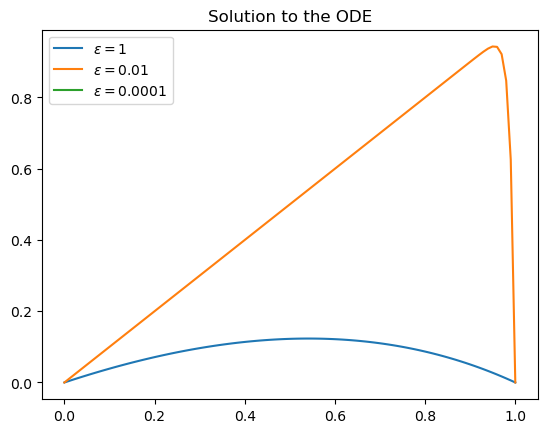

In [59]:
x = np.linspace(0,1,100)
psi = 1
epsilons = [1,0.01,0.0001]

for eps in epsilons:
    plt.plot(x,u(x,1/eps,psi),label=r'$\epsilon = $'+str(eps))

plt.legend()
plt.title('Solution to the ODE')
plt.show()

In [31]:
import numpy as np
from scipy.sparse import csr_matrix
K = lambda h, psi, eps: np.array([[eps/h + psi/2, -eps/h + psi/2], [-eps/h - psi/2, eps/h - psi/2]])

def GlobalAssembly(x,eps,psi,c,d):
    M = len(x)
    nnzmax = 4 * M
    ii = np.ones(nnzmax, dtype=int)
    jj = np.ones(nnzmax, dtype=int)
    ss = np.zeros(nnzmax)
    b = np.zeros(M)
    count = 0
    for i in range(M - 1):
        h = x[i+1] - x[i]
        b[i] += h/2
        b[i+1] += h/2

        Ki = K(h,psi,eps)

        ii[count:count + 4] = [i, i, i + 1, i + 1]
        jj[count:count + 4] = [i, i + 1, i + 1, i]
        ss[count:count + 4] = [
        Ki[0, 0],
        Ki[0, 1],
        Ki[1, 1],
        Ki[1, 0]
        ]
        count += 4
    
    A = csr_matrix((ss[:count], (ii[:count], jj[:count])), shape=(M, M))

    # Boundary conditions
    b[0] = c
    b[1] -= A[0,1]*c

    A[0,0] = 1
    A[0,1] = 0
    A[1,0] = 0
    
    b[M-1] = d
    b[M-2] -= A[M-1,M-2]*d

    A[M-1,M-1] = 1
    A[M-1,M-2] = 0
    A[M-2,M-1] = 0

    return A, b

In [47]:
from scipy import sparse
import numpy as np

def BVP1D(L, x, eps,psi=1,c=0, d=0, plot=True):
    
    if type(x) == int:
        x = np.linspace(0, L, x)

    A,b = GlobalAssembly(x,eps,psi,c,d)

    u = sparse.linalg.spsolve(A, b)
    
    if plot:
        plt.plot(x, u, 'r--',label="FEM solution")
        plt.show()

    return u


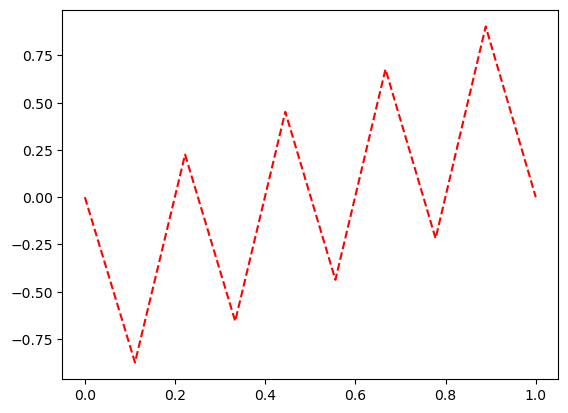

array([ 0.        , -0.87446432,  0.22577669, -0.65580939,  0.45157907,
       -0.43718023,  0.67740731, -0.21857704,  0.90326162,  0.        ])

In [53]:
BVP1D(L=1,x=np.linspace(0,1,10),eps=0.0001,psi=1,plot=True)

In [4]:
def compute_error_decrease(fun,VX,EToV):
    err = np.zeros(len(EToV))
    for i,elem in enumerate(EToV):
        

    


# function [err] = compute error decrease(fun,VX,EToV)

In [6]:
test = np.array([[1,2,3],[5,6,7]])

In [14]:
for i,elem in enumerate(test):
    print(i,elem)

0 [1 2 3]
1 [5 6 7]


Let $x'$ denote the the new point between $x_{i}$ and $x_{i+1}$. We recall that $\hat{u}_{h} = u$ on $\{x_{i},x_{i+1}\}$ and $\hat{u}_{1/2} = u$ on $\{x_{i}, x',x_{i+1}\}$.

We simplify by computing

\begin{align*}
    a-a_1 & = \frac{\hat{u}_h(x_{i+1}) - \hat{u}_h(x_{i})}{ x_{i+1} - x_i} -  \frac{\hat{u}_{h/2}(x') - \hat{u}_{h/2}(x_{i})}{ x' - x_i}\\
          & = \frac{u(x_{i+1}) - u(x_{i})}{ x_{i+1} - x_i} -  \frac{u(x') - u(x_{i})}{ \frac{1}{2}(x_{i+1} - x_i)}\\
          & = \frac{u(x_{i+1}) - u(x_{i}) - 2u(x') + 2u(x_{i}) }{ x_{i+1} - x_i} =  \frac{u(x_{i+1}) + u(x_{i}) - 2u(x') }{ x_{i+1} - x_i} 
\end{align*}

and

\begin{align*}
    b-b_1 = (\hat{u}_{h}(x_{i}) - ax_1) - (\hat{u}_{h/2}(x_{i}) - a_1x_{i}) = u(x_{i}) - ax_{i} - (y(x_{i}) - a_1x_{i}) = (a_1-a)x_{i}
\end{align*}

Likewise we can conclude

\begin{align*}
    a-a_2 & = \frac{\hat{u}_h(x_{i+1}) - \hat{u}_h(x_{i})}{ x_{i+1} - x_i} -  \frac{\hat{u}_{h/2}(x_{i+1}) - \hat{u}_{h/2}(x')}{x_{i+1}-x'}\\
          & = \frac{u(x_{i+1}) - u(x_{i})}{ x_{i+1} - x_i} -  \frac{u(x_{i+1}) - u(x')}{ \frac{1}{2}(x_{i+1}-x_{i})}\\
          & = \frac{u(x_{i+1}) - u(x_{i}) - 2u(x_{i+1}) + 2u(x') }{ x_{i+1} - x_i} =  \frac{-u(x_{i+1}) - u(x_{i}) + 2u(x') }{ x_{i+1} - x_i} = -(a-a_1)
\end{align*}

and

\begin{align*}
    b-b_2 = \hat{u}_{h}(x_{i+1}) - ax_{i+1} - (\hat{u}_{h/2}(x_{i+1}) - a_2x_{i+1}) = u(x_{i+1}) - ax_{i+1} - (y(x_{i+1}) - a_2x_{i+1}) = (a_2-a)x_{i+1}
\end{align*}
